| Data Dictionary | | Levels |
|---|---|---|
**Age** | Age of the employee
**Attrition** | Whether the employee left in the previous year or not
**BusinessTravel** | How frequently the employees travelled for business purposes in the last year
**Department** | Department in company
**DistanceFromHome** | Distance from home in kms
**Education** | Education Level |  1 'Below College' <br> 2 'College' <br> 3 'Bachelor' <br> 4 'Master' <br> 5 'Doctor'
**EducationField** |  Field of education
**EmployeeCount** | Employee count
**EmployeeNumber** | Employee number/id
**EnvironmentSatisfaction** | Work Environment Satisfaction Level | 1 'Low' <br> 2 'Medium' <br> 3 'High' <br> 4 'Very High'
**Gender** | Gender of employee
**JobInvolvement** | Job Involvement Level | 1 'Low' <br> 2 'Medium' <br> 3 'High' <br> 4 'Very High'
**JobLevel** | Job level at company on a scale of 1 to 5
**JobRole** | Name of job role in company
**JobSatisfaction** | Job Satisfaction Level | 1 'Low' <br> 2 'Medium' <br> 3 'High' <br> 4 'Very High'
**MaritalStatus** | Marital status of the employee
**MonthlyIncome** | Monthly income in rupees per month
**NumCompaniesWorked** | Total number of companies the employee has worked for
**Over18** | Whether the employee is above 18 years of age or not
**PercentSalaryHike** | Percent salary hike for last year
**PerformanceRating** | Performance rating for last year | 1 'Low' <br> 2 'Good' <br> 3 'Excellent' <br> 4 'Outstanding'
**RelationshipSatisfaction** | Relationship satisfaction level | 1 'Low' <br> 2 'Medium' <br> 3 'High' <br> 4 'Very High'
**StandardHours** | Standard hours of work for the employee
**StockOptionLevel** | Stock option level of the employee
**TotalWorkingYears** | Total number of years the employee has worked so far
**TrainingTimesLastYear** | Number of times training was conducted for this employee last year
**WorkLifeBalance** | Work life balance level | 1 'Bad' <br> 2 'Good' <br> 3 'Better' <br> 4 'Best'
**YearsAtCompany** | Total number of years spent at the company by the employee
**YearsSinceLastPromotion** | Number of years since last promotion
**YearsWithCurrManager** | Number of years under current manager

Install packages and source dependency files.

In [16]:
if(0) {
    install.packages("psych", dependencies = TRUE)
    install.packages("pastecs", dependencies = TRUE)
    install.packages("dplyr", dependencies = TRUE)
    install.packages("ggplot2", dependencies = TRUE)
    install.packages("Amelia", dependencies = TRUE)
    install.packages("mlbench", dependencies = TRUE)
    install.packages("caret", dependencies = TRUE)
}

In [17]:
source("pairs.r")

library(dplyr)
library(ggplot2)
library(pastecs)
library(psych)
library(Amelia)
library(mlbench)
library(corrplot)
library(caret)

----

Next, we are are going to load all of our datasets and store them in a top-level "data" object.

In [18]:
data.general = read.csv2("data/general_data.csv", sep=",")
# data.employee_survey = read.csv2("data/employee_survey_data.csv", sep=",")
# data.manager_survey = read.csv2("data/manager_survey_data.csv", sep=",")
# data.in_time = read.csv2("data/in_time.csv", sep=",")
# data.out_time = read.csv2("data/out_time.csv", sep=",")

----

**Data Exploration using Descriptive Statistics**

https://www.statmethods.net/stats/descriptives.html

R provides a wide range of functions for obtaining summary statistics. One method of obtaining descriptive statistics is to use the sapply( ) function with a specified summary statistic.

----

Let's split our data by numeric and categorical variables.

In [19]:
data.fields.gen_num<-c('Age','DistanceFromHome','JobLevel','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager')
data.fields.gen_cat<-c('BusinessTravel','Department','Education','EducationField','EmployeeCount','Gender','JobRole','MaritalStatus','Over18','StockOptionLevel')

# NumCompaniesWorked and TotalWorkingYears have NAs
# I do not currently know how to "treat" these yet so excluding them from dataset for now
data.fields.gen_num<-data.fields.gen_num[-c(5,7)]

# Removing NumCompaniesWorked and TotalWorkingYears from dataset entirely
data.general<-select(data.general, -c('NumCompaniesWorked', 'TotalWorkingYears'))

data.general$Attrition <- ifelse(data.general$Attrition == "Yes", 1, 0)
data.general$Attrition <- factor(data.general$Attrition, levels = c(0, 1))

# Missing Value Treatment

In [5]:
# TODO explore to understand why it breaks
# summary(data.general)
#data.general[] <- lapply(data.general, function(x) ifelse(is.na(x), mean(x, na.rm = TRUE), x))
# data.general[] <- lapply(data.general, function(x) ifelse(is.null(x), mean(x, na.rm = TRUE), x))

# Ordinal Factors

In [30]:
names(data.general)

# EducationLevel - Force to Ordinal Factor
data.general[,6]<-factor(data.general[,6], order = TRUE, levels=c(1,2,3,4,5))

# JobLevel - Force to Ordinal Factor
data.general[,11]<-factor(data.general[,11], order = TRUE, levels=c(1,2,3,4,5))

# StockOptionLevel - Force to Ordinal Factor
data.general[,18]<-factor(data.general[,18], order = TRUE, levels=c(0,1,2,3))

# coerce each categorical variable as factors
#data.general[data.fields.gen_cat]<-lapply(data.general[data.fields.gen_cat], as.factor)

for(cat in list('BusinessTravel','Department','EducationField','EmployeeCount','Gender','JobRole','MaritalStatus','Over18')) {
    data.general[cat]<-lapply(data.general[cat], as.factor)
}

# Create general numeric and categorical datasets
data.gen_num<-select(data.general, data.fields.gen_num)
data.gen_cat<-select(data.general, data.fields.gen_cat)

stat.desc(data.general)

[1] "Age"                     "Attrition"              
 [3] "BusinessTravel"          "Department"             
 [5] "DistanceFromHome"        "Education"              
 [7] "EducationField"          "EmployeeCount"          
 [9] "EmployeeID"              "Gender"                 
[11] "JobLevel"                "JobRole"                
[13] "MaritalStatus"           "MonthlyIncome"          
[15] "Over18"                  "PercentSalaryHike"      
[17] "StandardHours"           "StockOptionLevel"       
[19] "TrainingTimesLastYear"   "YearsAtCompany"         
[21] "YearsSinceLastPromotion" "YearsWithCurrManager"

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,⋯,MaritalStatus,MonthlyIncome,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
,<dbl>,<lgl>,<lgl>,<lgl>,<dbl>,<lgl>,<lgl>,<lgl>,<dbl>,<lgl>,⋯,<lgl>,<dbl>,<lgl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
nbr.val,4.410000e+03,NA,NA,NA,4.410000e+03,NA,NA,NA,4.410000e+03,NA,⋯,NA,4.410000e+03,NA,4.410000e+03,4410,NA,4.410000e+03,4.410000e+03,4.410000e+03,4.410000e+03
nbr.null,0.000000e+00,NA,NA,NA,0.000000e+00,NA,NA,NA,0.000000e+00,NA,⋯,NA,0.000000e+00,NA,0.000000e+00,0,NA,1.620000e+02,1.320000e+02,1.743000e+03,7.890000e+02
nbr.na,0.000000e+00,NA,NA,NA,0.000000e+00,NA,NA,NA,0.000000e+00,NA,⋯,NA,0.000000e+00,NA,0.000000e+00,0,NA,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
min,1.800000e+01,NA,NA,NA,1.000000e+00,NA,NA,NA,1.000000e+00,NA,⋯,NA,1.009000e+04,NA,1.100000e+01,8,NA,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.000000e+01,NA,NA,NA,2.900000e+01,NA,NA,NA,4.410000e+03,NA,⋯,NA,1.999900e+05,NA,2.500000e+01,8,NA,6.000000e+00,4.000000e+01,1.500000e+01,1.700000e+01
range,4.200000e+01,NA,NA,NA,2.800000e+01,NA,NA,NA,4.409000e+03,NA,⋯,NA,1.899000e+05,NA,1.400000e+01,0,NA,6.000000e+00,4.000000e+01,1.500000e+01,1.700000e+01
sum,1.628340e+05,NA,NA,NA,4.053900e+04,NA,NA,NA,9.726255e+06,NA,⋯,NA,2.867793e+08,NA,6.707400e+04,35280,NA,1.234500e+04,3.090600e+04,9.648000e+03,1.818300e+04
median,3.600000e+01,NA,NA,NA,7.000000e+00,NA,NA,NA,2.205500e+03,NA,⋯,NA,4.919000e+04,NA,1.400000e+01,8,NA,3.000000e+00,5.000000e+00,1.000000e+00,3.000000e+00
mean,3.692381e+01,NA,NA,NA,9.192517e+00,NA,NA,NA,2.205500e+03,NA,⋯,NA,6.502931e+04,NA,1.520952e+01,8,NA,2.799320e+00,7.008163e+00,2.187755e+00,4.123129e+00


In [31]:
attach(data.general)

The following objects are masked from data.general (pos = 3):

    Age, Attrition, BusinessTravel, Department, DistanceFromHome,
    Education, EducationField, EmployeeCount, EmployeeID, Gender,
    JobLevel, JobRole, MaritalStatus, MonthlyIncome, Over18,
    PercentSalaryHike, StandardHours, StockOptionLevel,
    TrainingTimesLastYear, YearsAtCompany, YearsSinceLastPromotion,
    YearsWithCurrManager


The following objects are masked from data.general (pos = 4):

    Age, Attrition, BusinessTravel, Department, DistanceFromHome,
    Education, EducationField, EmployeeCount, EmployeeID, Gender,
    JobLevel, JobRole, MaritalStatus, MonthlyIncome, Over18,
    PercentSalaryHike, StandardHours, StockOptionLevel,
    TrainingTimesLastYear, YearsAtCompany, YearsSinceLastPromotion,
    YearsWithCurrManager




In [32]:
# get means for variables in data frame mydata
# excluding missing values
# stats.mean<-sapply(data.general, mean, na.rm=TRUE)
#stats.mean["Age"]

# Replace all null values with mean of column
#for(i in 1:ncol(data.general)){
#  data.general[is.na(data[,i]), i] <- mean(data.general[,i], na.rm = TRUE)
#}

In [33]:
str(data.general)
summary(data.general)

'data.frame':	4410 obs. of  22 variables:
 $ Age                    : int  51 31 32 38 32 46 28 29 31 25 ...
 $ Attrition              : Factor w/ 2 levels "0","1": 1 2 1 1 1 1 2 1 1 1 ...
 $ BusinessTravel         : Factor w/ 3 levels "Non-Travel","Travel_Frequently",..: 3 2 2 1 3 3 3 3 3 1 ...
 $ Department             : Factor w/ 3 levels "Human Resources",..: 3 2 2 2 2 2 2 2 2 2 ...
 $ DistanceFromHome       : int  6 10 17 2 10 8 11 18 1 7 ...
 $ Education              : Ord.factor w/ 5 levels "1"<"2"<"3"<"4"<..: 2 1 4 5 1 3 2 3 3 4 ...
 $ EducationField         : Factor w/ 6 levels "Human Resources",..: 2 2 5 2 4 2 4 2 2 4 ...
 $ EmployeeCount          : Factor w/ 1 level "1": 1 1 1 1 1 1 1 1 1 1 ...
 $ EmployeeID             : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Gender                 : Factor w/ 2 levels "Female","Male": 1 1 2 2 2 1 2 2 2 1 ...
 $ JobLevel               : Ord.factor w/ 5 levels "1"<"2"<"3"<"4"<..: 1 1 4 3 1 4 2 2 3 4 ...
 $ JobRole                : Factor w/ 9 leve

      Age        Attrition           BusinessTravel
 Min.   :18.00   0:3699    Non-Travel       : 450  
 1st Qu.:30.00   1: 711    Travel_Frequently: 831  
 Median :36.00             Travel_Rarely    :3129  
 Mean   :36.92                                     
 3rd Qu.:43.00                                     
 Max.   :60.00                                     
                                                   
                  Department   DistanceFromHome Education
 Human Resources       : 189   Min.   : 1.000   1: 510   
 Research & Development:2883   1st Qu.: 2.000   2: 846   
 Sales                 :1338   Median : 7.000   3:1716   
                               Mean   : 9.193   4:1194   
                               3rd Qu.:14.000   5: 144   
                               Max.   :29.000            
                                                         
          EducationField EmployeeCount   EmployeeID      Gender     JobLevel
 Human Resources :  81   1:4410        Min.

In [42]:
describe(data.general)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Age,1,4410,36.923810,9.133301e+00,36.0,36.471088,8.8956,18,60,42,0.4127240,-0.4080266,1.375335e-01
Attrition*,2,4410,1.161224,3.677796e-01,1.0,1.076531,0.0000,1,2,1,1.8418569,1.3927529,5.538196e-03
BusinessTravel*,3,4410,2.607483,6.653040e-01,3.0,2.759354,0.0000,1,3,2,-1.4370483,0.6945433,1.001846e-02
Department*,4,4410,2.260544,5.276726e-01,2.0,2.254252,0.0000,1,3,2,0.1719965,-0.3953650,7.945939e-03
DistanceFromHome,5,4410,9.192517,8.105026e+00,7.0,8.084184,7.4130,1,29,28,0.9568145,-0.2294052,1.220492e-01
Education*,6,4410,2.912925,1.023933e+00,3.0,2.975340,1.4826,1,5,4,-0.2892870,-0.5623997,1.541885e-02
EducationField*,7,4410,3.247619,1.331067e+00,3.0,3.095238,1.4826,1,6,5,0.5496225,-0.6908691,2.004383e-02
EmployeeCount*,8,4410,1.000000,0.000000e+00,1.0,1.000000,0.0000,1,1,0,NaN,NaN,0.000000e+00
EmployeeID,9,4410,2205.500000,1.273202e+03,2205.5,2205.500000,1634.5665,1,4410,4409,0.0000000,-1.2008164,1.917246e+01


In [43]:
str(data.general)

'data.frame':	4410 obs. of  22 variables:
 $ Age                    : int  51 31 32 38 32 46 28 29 31 25 ...
 $ Attrition              : Factor w/ 2 levels "0","1": 1 2 1 1 1 1 2 1 1 1 ...
 $ BusinessTravel         : Factor w/ 3 levels "Non-Travel","Travel_Frequently",..: 3 2 2 1 3 3 3 3 3 1 ...
 $ Department             : Factor w/ 3 levels "Human Resources",..: 3 2 2 2 2 2 2 2 2 2 ...
 $ DistanceFromHome       : int  6 10 17 2 10 8 11 18 1 7 ...
 $ Education              : Ord.factor w/ 5 levels "1"<"2"<"3"<"4"<..: 2 1 4 5 1 3 2 3 3 4 ...
 $ EducationField         : Factor w/ 6 levels "Human Resources",..: 2 2 5 2 4 2 4 2 2 4 ...
 $ EmployeeCount          : Factor w/ 1 level "1": 1 1 1 1 1 1 1 1 1 1 ...
 $ EmployeeID             : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Gender                 : Factor w/ 2 levels "Female","Male": 1 1 2 2 2 1 2 2 2 1 ...
 $ JobLevel               : Ord.factor w/ 5 levels "1"<"2"<"3"<"4"<..: 1 1 4 3 1 4 2 2 3 4 ...
 $ JobRole                : Factor w/ 9 leve

In [26]:
# from library pastecs
stat.desc(data.general)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,⋯,MaritalStatus,MonthlyIncome,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
,<dbl>,<lgl>,<lgl>,<lgl>,<dbl>,<lgl>,<lgl>,<lgl>,<dbl>,<lgl>,⋯,<lgl>,<dbl>,<lgl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
nbr.val,4.410000e+03,NA,NA,NA,4.410000e+03,NA,NA,NA,4.410000e+03,NA,⋯,NA,4.410000e+03,NA,4.410000e+03,4410,NA,4.410000e+03,4.410000e+03,4.410000e+03,4.410000e+03
nbr.null,0.000000e+00,NA,NA,NA,0.000000e+00,NA,NA,NA,0.000000e+00,NA,⋯,NA,0.000000e+00,NA,0.000000e+00,0,NA,1.620000e+02,1.320000e+02,1.743000e+03,7.890000e+02
nbr.na,0.000000e+00,NA,NA,NA,0.000000e+00,NA,NA,NA,0.000000e+00,NA,⋯,NA,0.000000e+00,NA,0.000000e+00,0,NA,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
min,1.800000e+01,NA,NA,NA,1.000000e+00,NA,NA,NA,1.000000e+00,NA,⋯,NA,1.009000e+04,NA,1.100000e+01,8,NA,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.000000e+01,NA,NA,NA,2.900000e+01,NA,NA,NA,4.410000e+03,NA,⋯,NA,1.999900e+05,NA,2.500000e+01,8,NA,6.000000e+00,4.000000e+01,1.500000e+01,1.700000e+01
range,4.200000e+01,NA,NA,NA,2.800000e+01,NA,NA,NA,4.409000e+03,NA,⋯,NA,1.899000e+05,NA,1.400000e+01,0,NA,6.000000e+00,4.000000e+01,1.500000e+01,1.700000e+01
sum,1.628340e+05,NA,NA,NA,4.053900e+04,NA,NA,NA,9.726255e+06,NA,⋯,NA,2.867793e+08,NA,6.707400e+04,35280,NA,1.234500e+04,3.090600e+04,9.648000e+03,1.818300e+04
median,3.600000e+01,NA,NA,NA,7.000000e+00,NA,NA,NA,2.205500e+03,NA,⋯,NA,4.919000e+04,NA,1.400000e+01,8,NA,3.000000e+00,5.000000e+00,1.000000e+00,3.000000e+00
mean,3.692381e+01,NA,NA,NA,9.192517e+00,NA,NA,NA,2.205500e+03,NA,⋯,NA,6.502931e+04,NA,1.520952e+01,8,NA,2.799320e+00,7.008163e+00,2.187755e+00,4.123129e+00


Summarize our continuous variables:

In [44]:
summary(data.gen_num)
# plot(data.gen_num[,c(1,2,3)])

      Age        DistanceFromHome JobLevel MonthlyIncome    PercentSalaryHike
 Min.   :18.00   Min.   : 1.000   1:1629   Min.   : 10090   Min.   :11.00    
 1st Qu.:30.00   1st Qu.: 2.000   2:1602   1st Qu.: 29110   1st Qu.:12.00    
 Median :36.00   Median : 7.000   3: 654   Median : 49190   Median :14.00    
 Mean   :36.92   Mean   : 9.193   4: 318   Mean   : 65029   Mean   :15.21    
 3rd Qu.:43.00   3rd Qu.:14.000   5: 207   3rd Qu.: 83800   3rd Qu.:18.00    
 Max.   :60.00   Max.   :29.000            Max.   :199990   Max.   :25.00    
 TrainingTimesLastYear YearsAtCompany   YearsSinceLastPromotion
 Min.   :0.000         Min.   : 0.000   Min.   : 0.000         
 1st Qu.:2.000         1st Qu.: 3.000   1st Qu.: 0.000         
 Median :3.000         Median : 5.000   Median : 1.000         
 Mean   :2.799         Mean   : 7.008   Mean   : 2.188         
 3rd Qu.:3.000         3rd Qu.: 9.000   3rd Qu.: 3.000         
 Max.   :6.000         Max.   :40.000   Max.   :15.000         
 Years

Summarize our categorical variables:

In [45]:
summary(data.gen_cat)

           BusinessTravel                  Department   Education
 Non-Travel       : 450   Human Resources       : 189   1: 510   
 Travel_Frequently: 831   Research & Development:2883   2: 846   
 Travel_Rarely    :3129   Sales                 :1338   3:1716   
                                                        4:1194   
                                                        5: 144   
                                                                 
                                                                 
          EducationField EmployeeCount    Gender    
 Human Resources :  81   1:4410        Female:1764  
 Life Sciences   :1818                 Male  :2646  
 Marketing       : 477                              
 Medical         :1392                              
 Other           : 246                              
 Technical Degree: 396                              
                                                    
                      JobRole     MaritalStatus 

'data.frame':	4410 obs. of  10 variables:
 $ BusinessTravel  : Factor w/ 3 levels "Non-Travel","Travel_Frequently",..: 3 2 2 1 3 3 3 3 3 1 ...
 $ Department      : Factor w/ 3 levels "Human Resources",..: 3 2 2 2 2 2 2 2 2 2 ...
 $ Education       : Ord.factor w/ 5 levels "1"<"2"<"3"<"4"<..: 2 1 4 5 1 3 2 3 3 4 ...
 $ EducationField  : Factor w/ 6 levels "Human Resources",..: 2 2 5 2 4 2 4 2 2 4 ...
 $ EmployeeCount   : Factor w/ 1 level "1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Gender          : Factor w/ 2 levels "Female","Male": 1 1 2 2 2 1 2 2 2 1 ...
 $ JobRole         : Factor w/ 9 levels "Healthcare Representative",..: 1 7 8 2 8 6 8 8 3 3 ...
 $ MaritalStatus   : Factor w/ 3 levels "Divorced","Married",..: 2 3 2 2 3 2 3 2 2 1 ...
 $ Over18          : Factor w/ 1 level "Y": 1 1 1 1 1 1 1 1 1 1 ...
 $ StockOptionLevel: Ord.factor w/ 4 levels "0"<"1"<"2"<"3": 1 2 4 4 3 1 2 4 1 2 ...


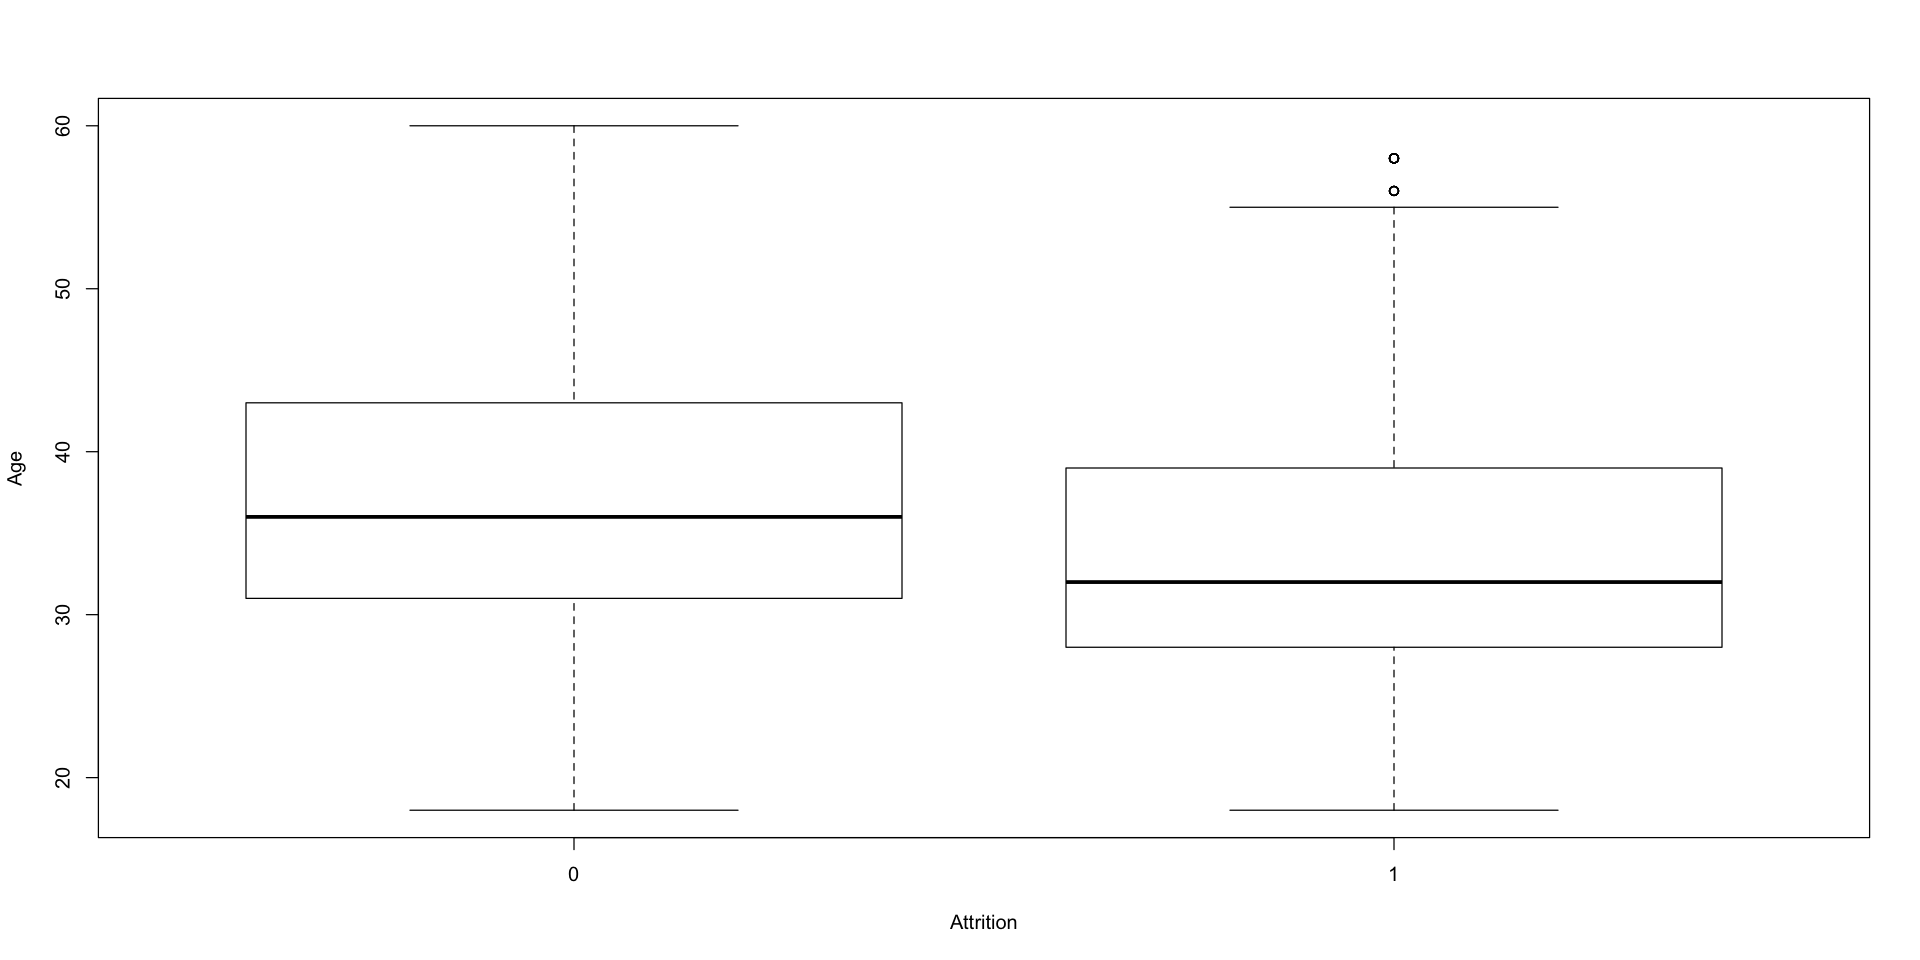

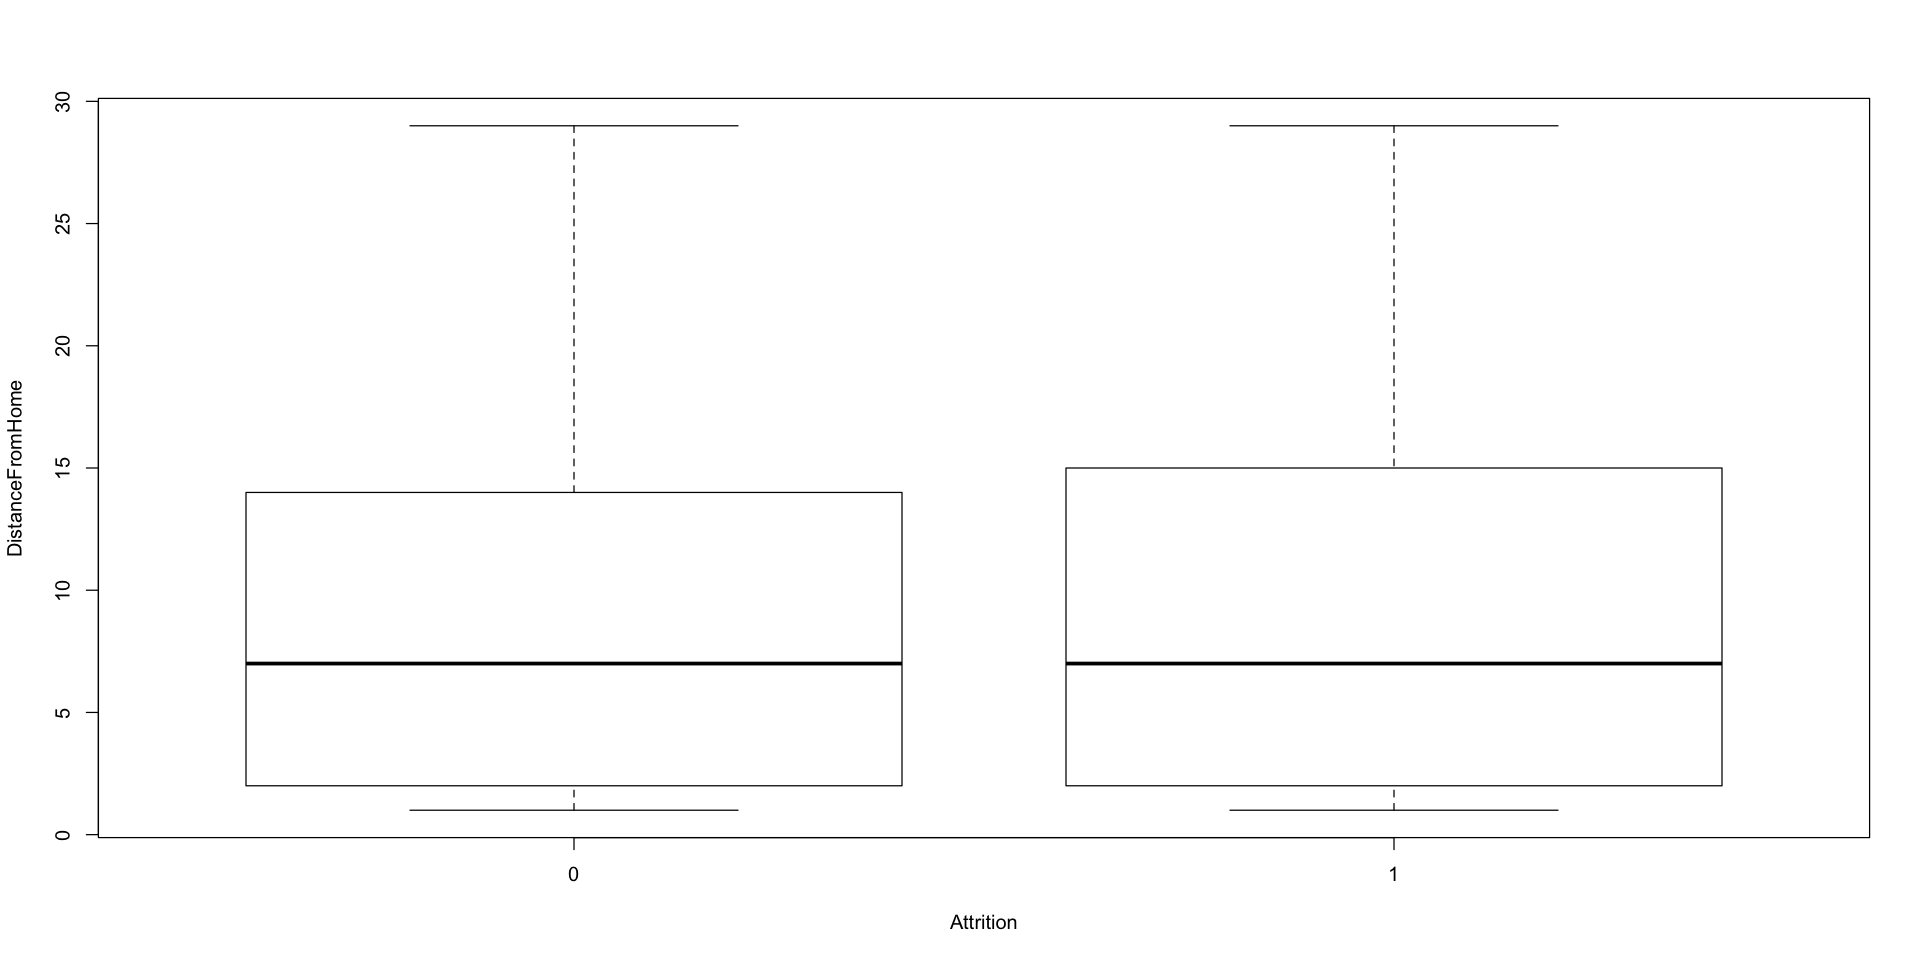

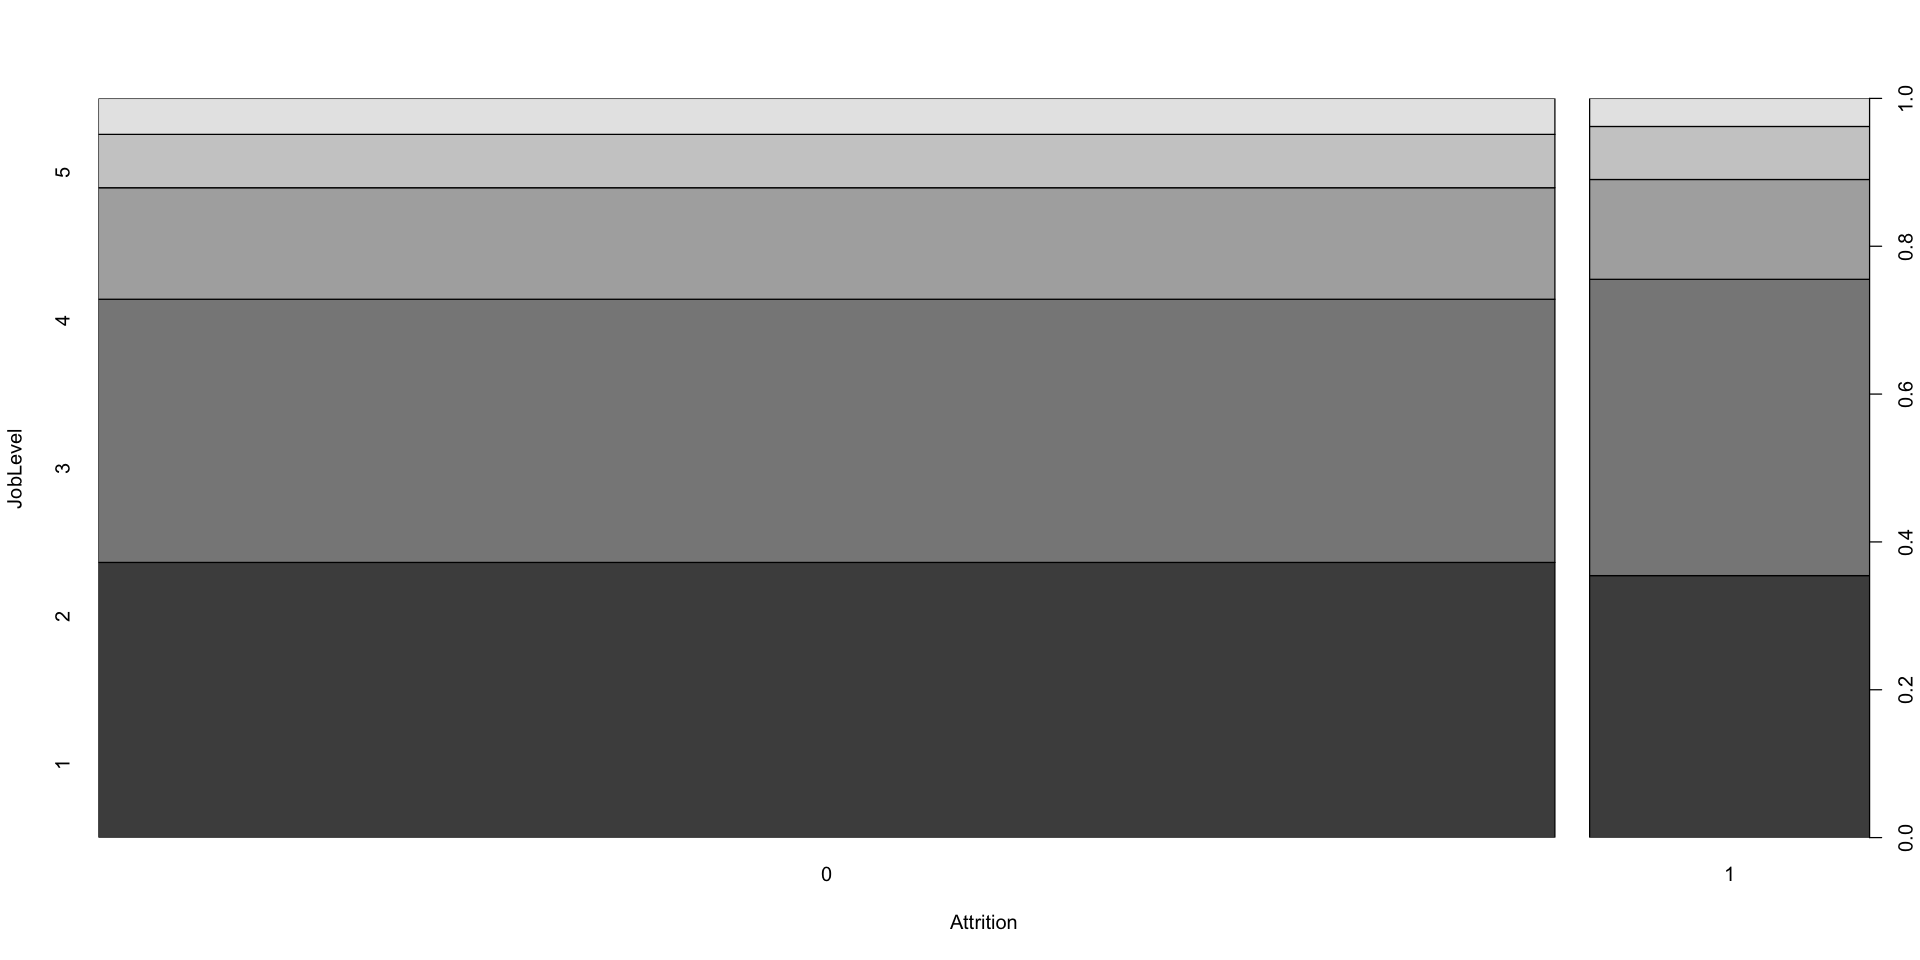

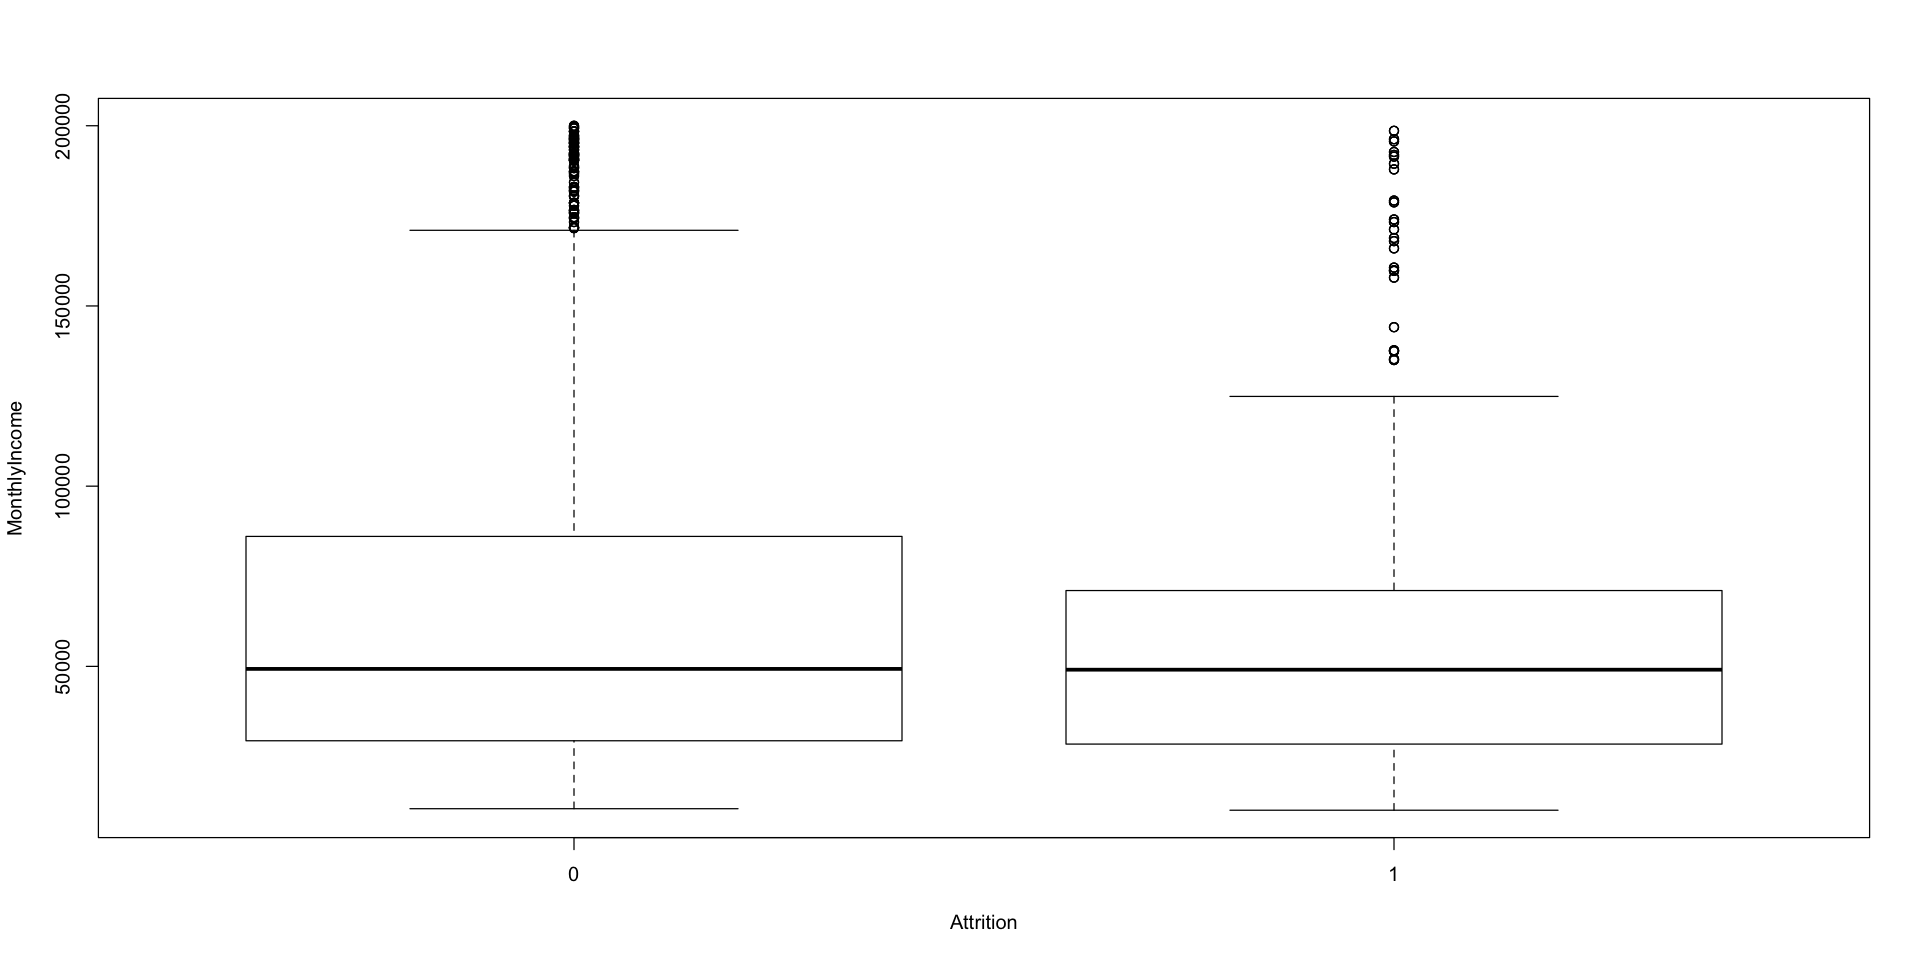

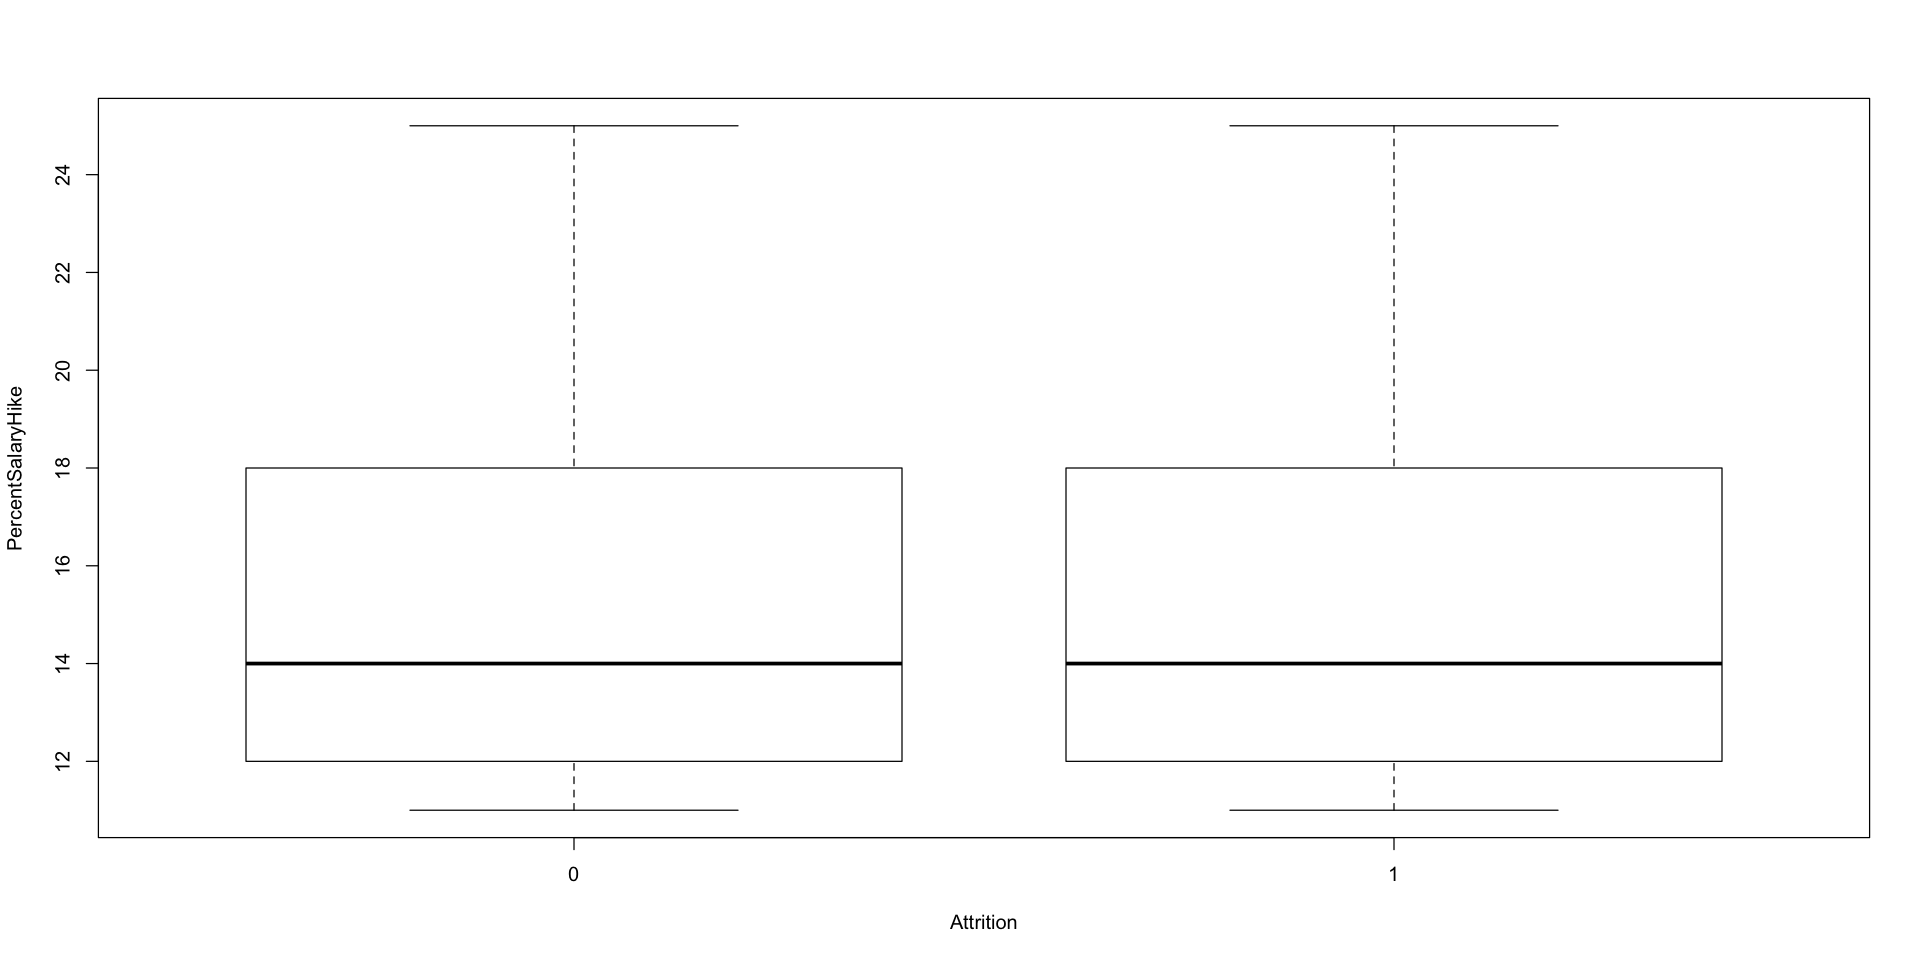

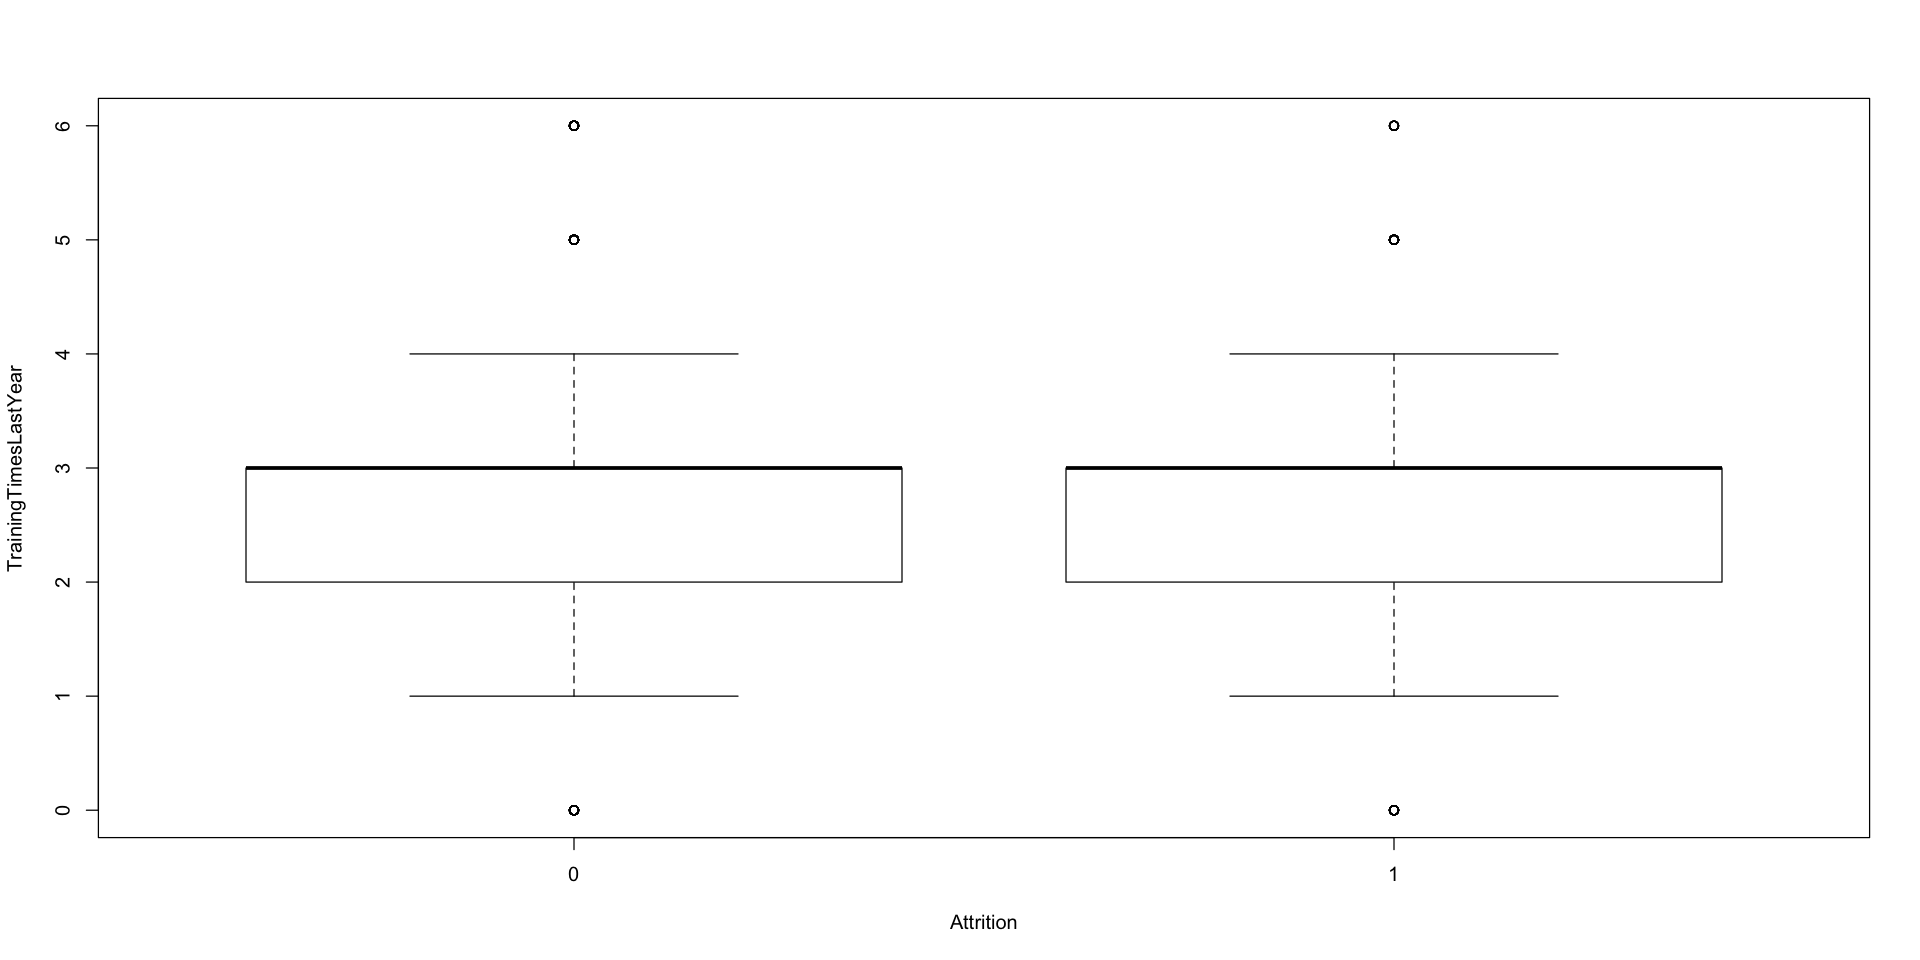

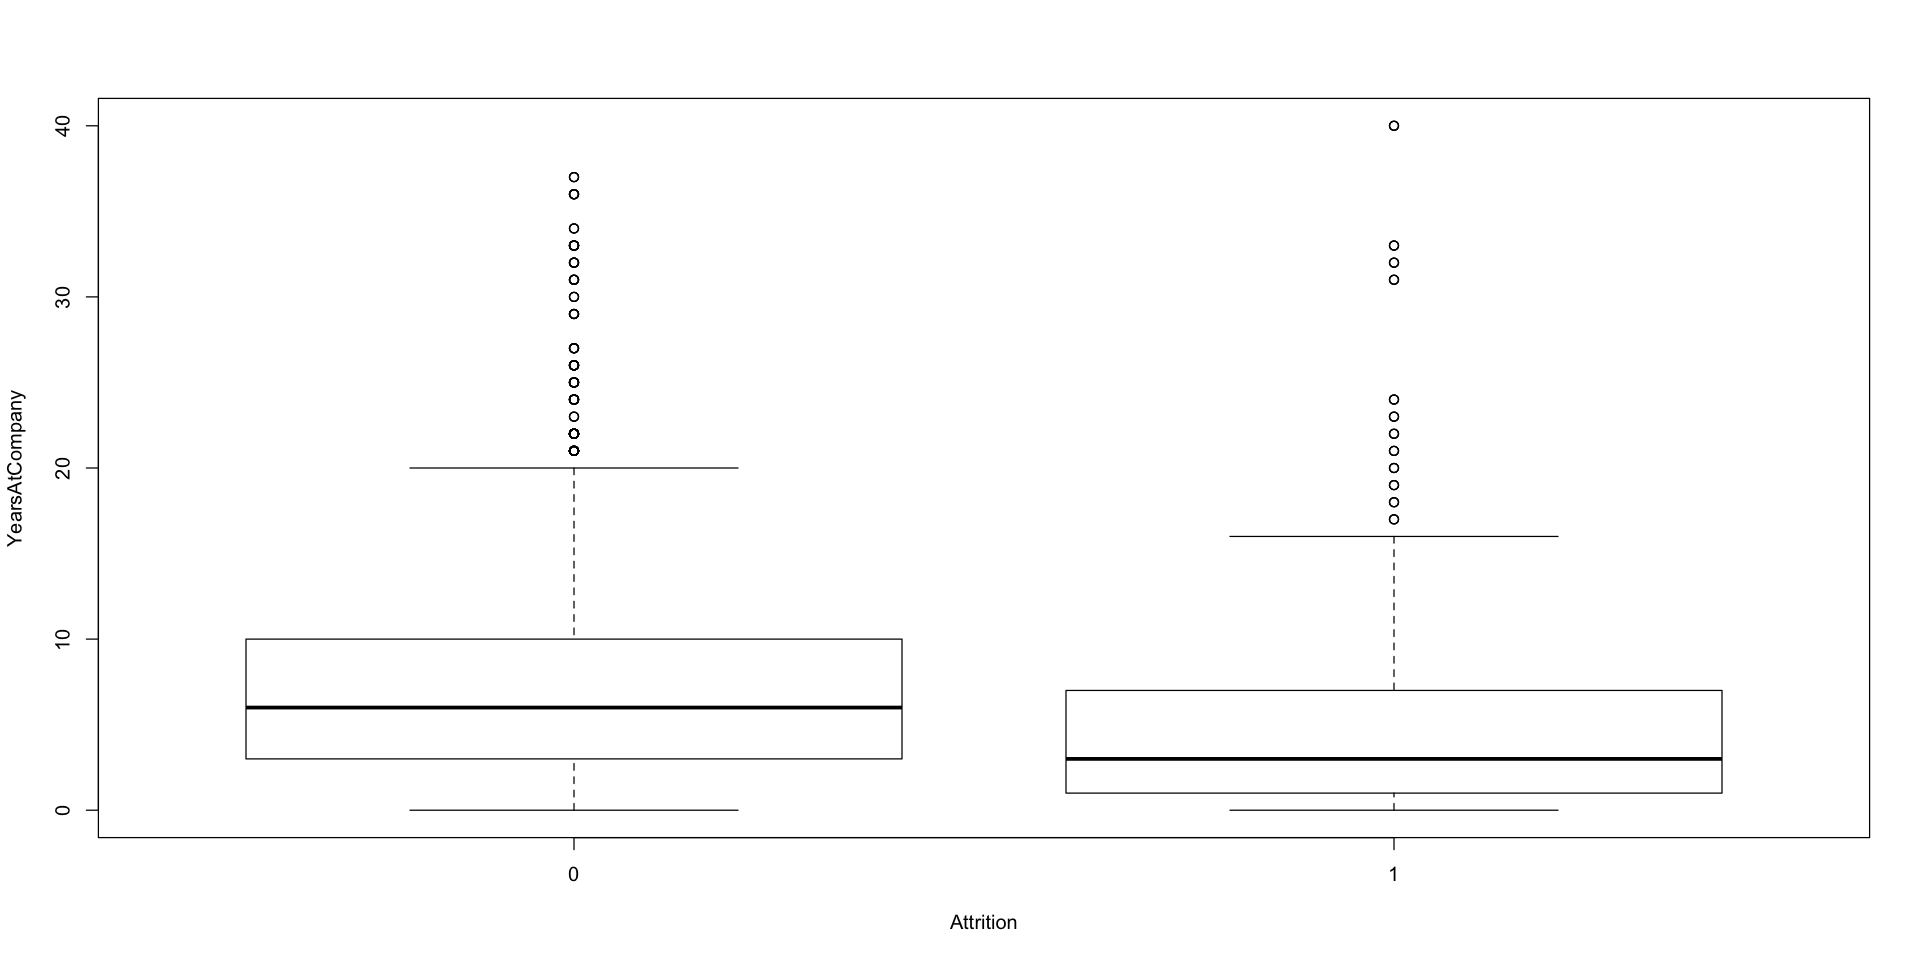

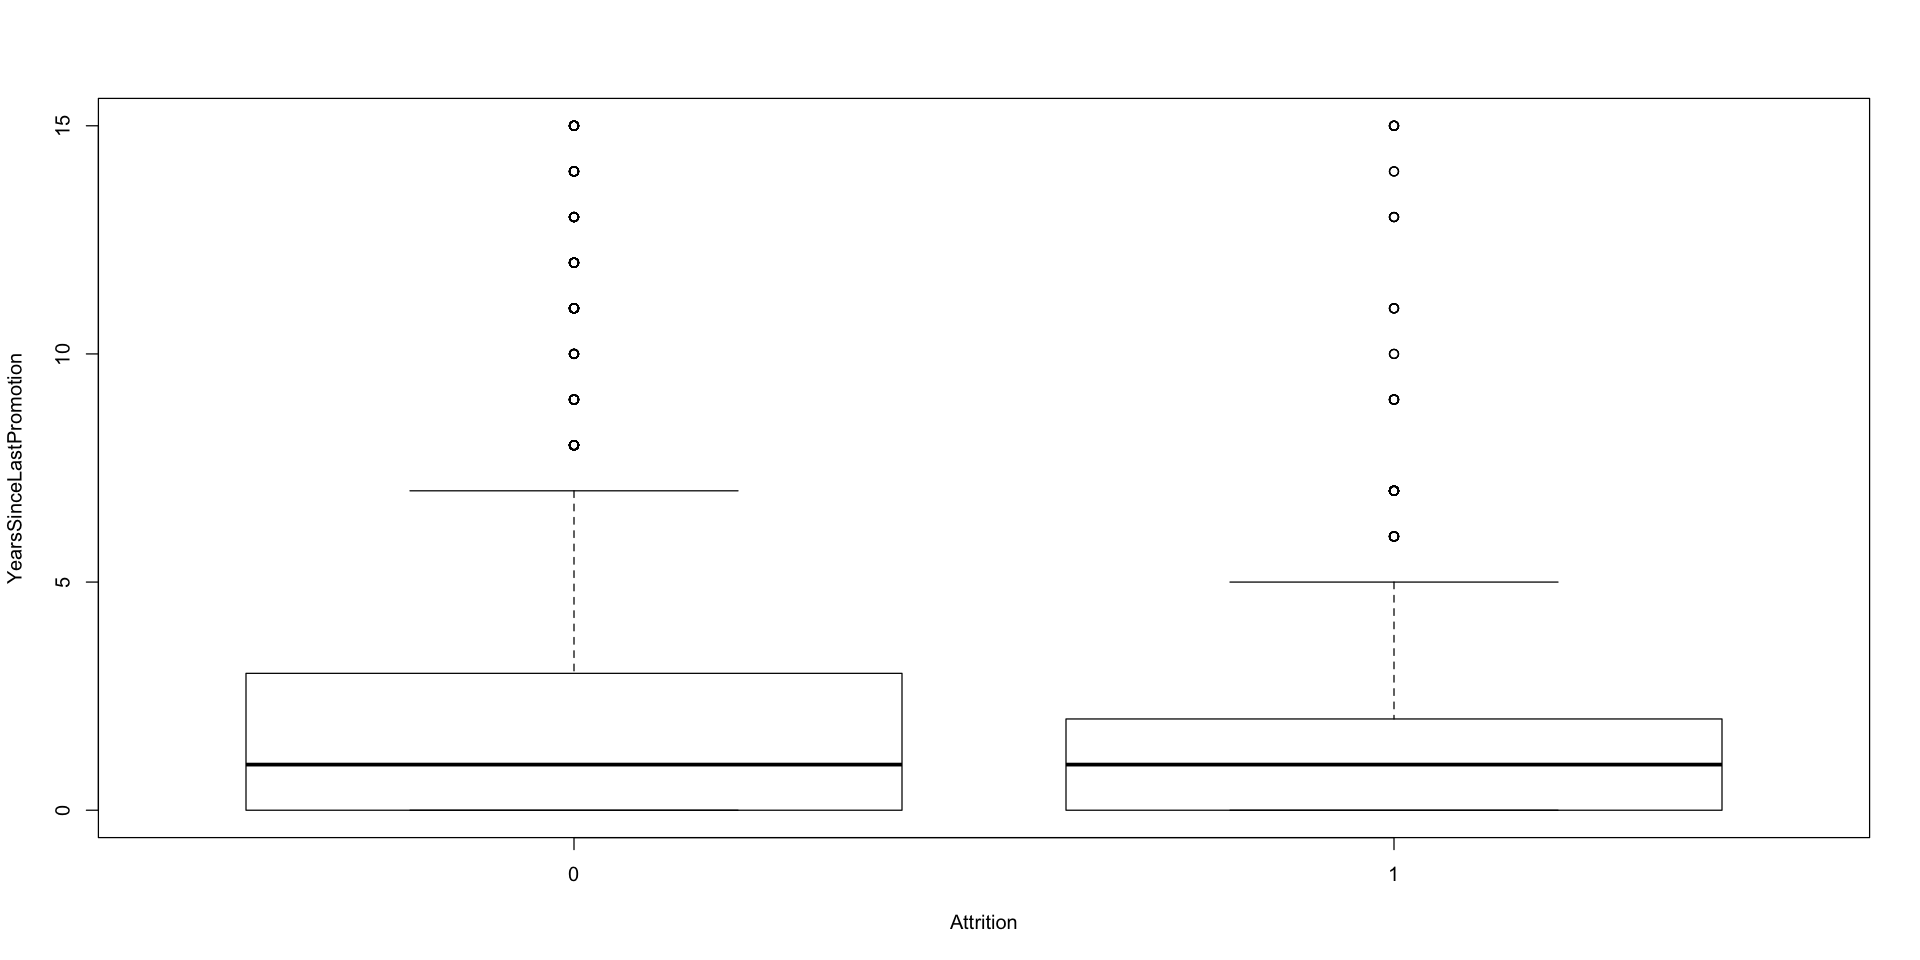

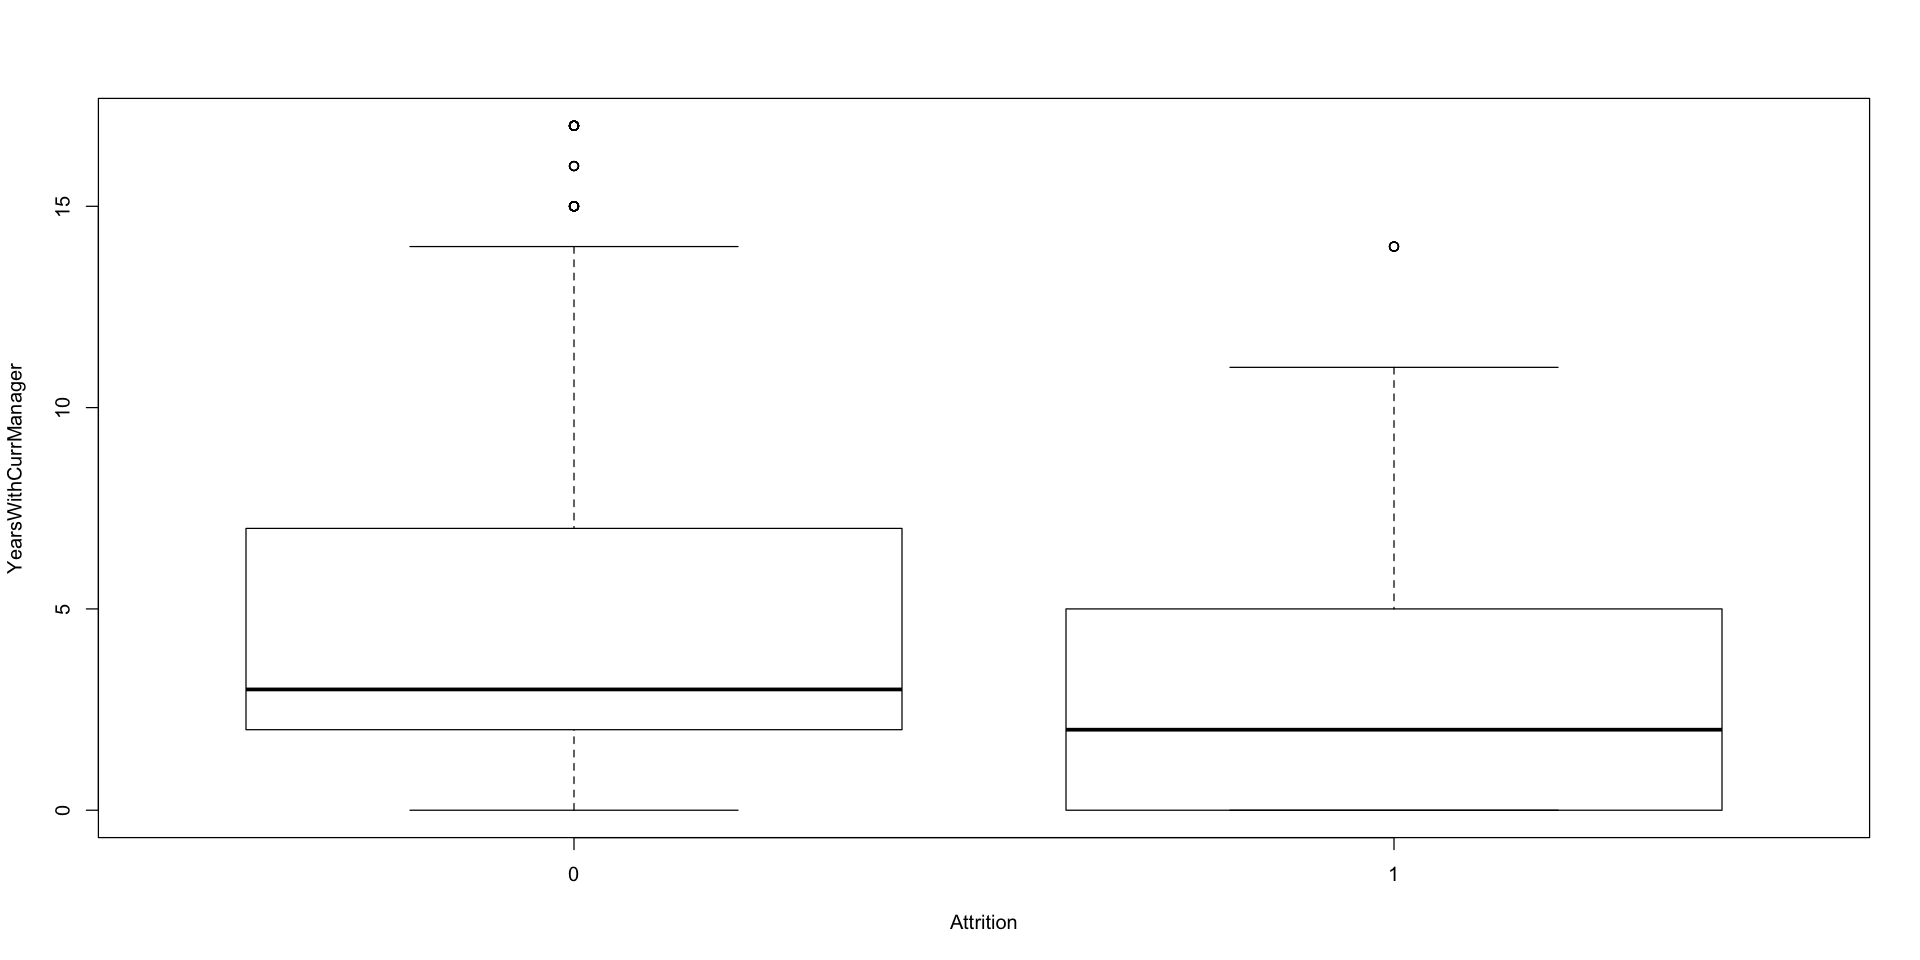

In [48]:
options(repr.plot.width = 16, repr.plot.height = 8, repr.plot.pointsize=12)

str(data.gen_cat)
for(i in 1:length(data.gen_cat)) {
#    plot(eval(parse(text=names(data.gen_cat)[i])), MonthlyIncome, xlab = names(data.gen_cat)[i], ylab = "Monthly Income")
}

for(i in 1:length(data.gen_num)) {
    plot(Attrition, eval(parse(text=names(data.gen_num)[i])), xlab = "Attrition", ylab = names(data.gen_num)[i])
}


# plot(c(0,1,1,0,0,1), c(4,23,55,3,67,41))

# plot(Attrition, MonthlyIncome, xlab = "Attrition", ylab = "Monthly Income")
# plot(BusinessTravel, MonthlyIncome, xlab = "Business Travel", ylab = "Monthly Income")
# plot(Department, MonthlyIncome, xlab = "Department", ylab = "Monthly Income")
# plot(EducationField, MonthlyIncome, xlab = "Education Field", ylab = "Monthly Income")
# plot(Gender, MonthlyIncome, xlab = "Gender", ylab = "Monthly Income")
# plot(JobRole, MonthlyIncome, xlab = "Job Role", ylab = "Monthly Income")
# plot(MaritalStatus, MonthlyIncome, xlab = "Marital Status", ylab = "Monthly Income")
# plot(Over18, MonthlyIncome, xlab = "Over 18", ylab = "Monthly Income")

      Age        DistanceFromHome JobLevel MonthlyIncome    PercentSalaryHike
 Min.   :18.00   Min.   : 1.000   1:1629   Min.   : 10090   Min.   :11.00    
 1st Qu.:30.00   1st Qu.: 2.000   2:1602   1st Qu.: 29110   1st Qu.:12.00    
 Median :36.00   Median : 7.000   3: 654   Median : 49190   Median :14.00    
 Mean   :36.92   Mean   : 9.193   4: 318   Mean   : 65029   Mean   :15.21    
 3rd Qu.:43.00   3rd Qu.:14.000   5: 207   3rd Qu.: 83800   3rd Qu.:18.00    
 Max.   :60.00   Max.   :29.000            Max.   :199990   Max.   :25.00    
 TrainingTimesLastYear YearsAtCompany   YearsSinceLastPromotion
 Min.   :0.000         Min.   : 0.000   Min.   : 0.000         
 1st Qu.:2.000         1st Qu.: 3.000   1st Qu.: 0.000         
 Median :3.000         Median : 5.000   Median : 1.000         
 Mean   :2.799         Mean   : 7.008   Mean   : 2.188         
 3rd Qu.:3.000         3rd Qu.: 9.000   3rd Qu.: 3.000         
 Max.   :6.000         Max.   :40.000   Max.   :15.000         
 Years

      Age        DistanceFromHome JobLevel MonthlyIncome    PercentSalaryHike
 Min.   :18.00   Min.   : 1.000   1:1629   Min.   : 10090   Min.   :11.00    
 1st Qu.:30.00   1st Qu.: 2.000   2:1602   1st Qu.: 29110   1st Qu.:12.00    
 Median :36.00   Median : 7.000   3: 654   Median : 49190   Median :14.00    
 Mean   :36.92   Mean   : 9.193   4: 318   Mean   : 65029   Mean   :15.21    
 3rd Qu.:43.00   3rd Qu.:14.000   5: 207   3rd Qu.: 83800   3rd Qu.:18.00    
 Max.   :60.00   Max.   :29.000            Max.   :199990   Max.   :25.00    
 TrainingTimesLastYear YearsAtCompany   YearsSinceLastPromotion
 Min.   :0.000         Min.   : 0.000   Min.   : 0.000         
 1st Qu.:2.000         1st Qu.: 3.000   1st Qu.: 0.000         
 Median :3.000         Median : 5.000   Median : 1.000         
 Mean   :2.799         Mean   : 7.008   Mean   : 2.188         
 3rd Qu.:3.000         3rd Qu.: 9.000   3rd Qu.: 3.000         
 Max.   :6.000         Max.   :40.000   Max.   :15.000         
 Years

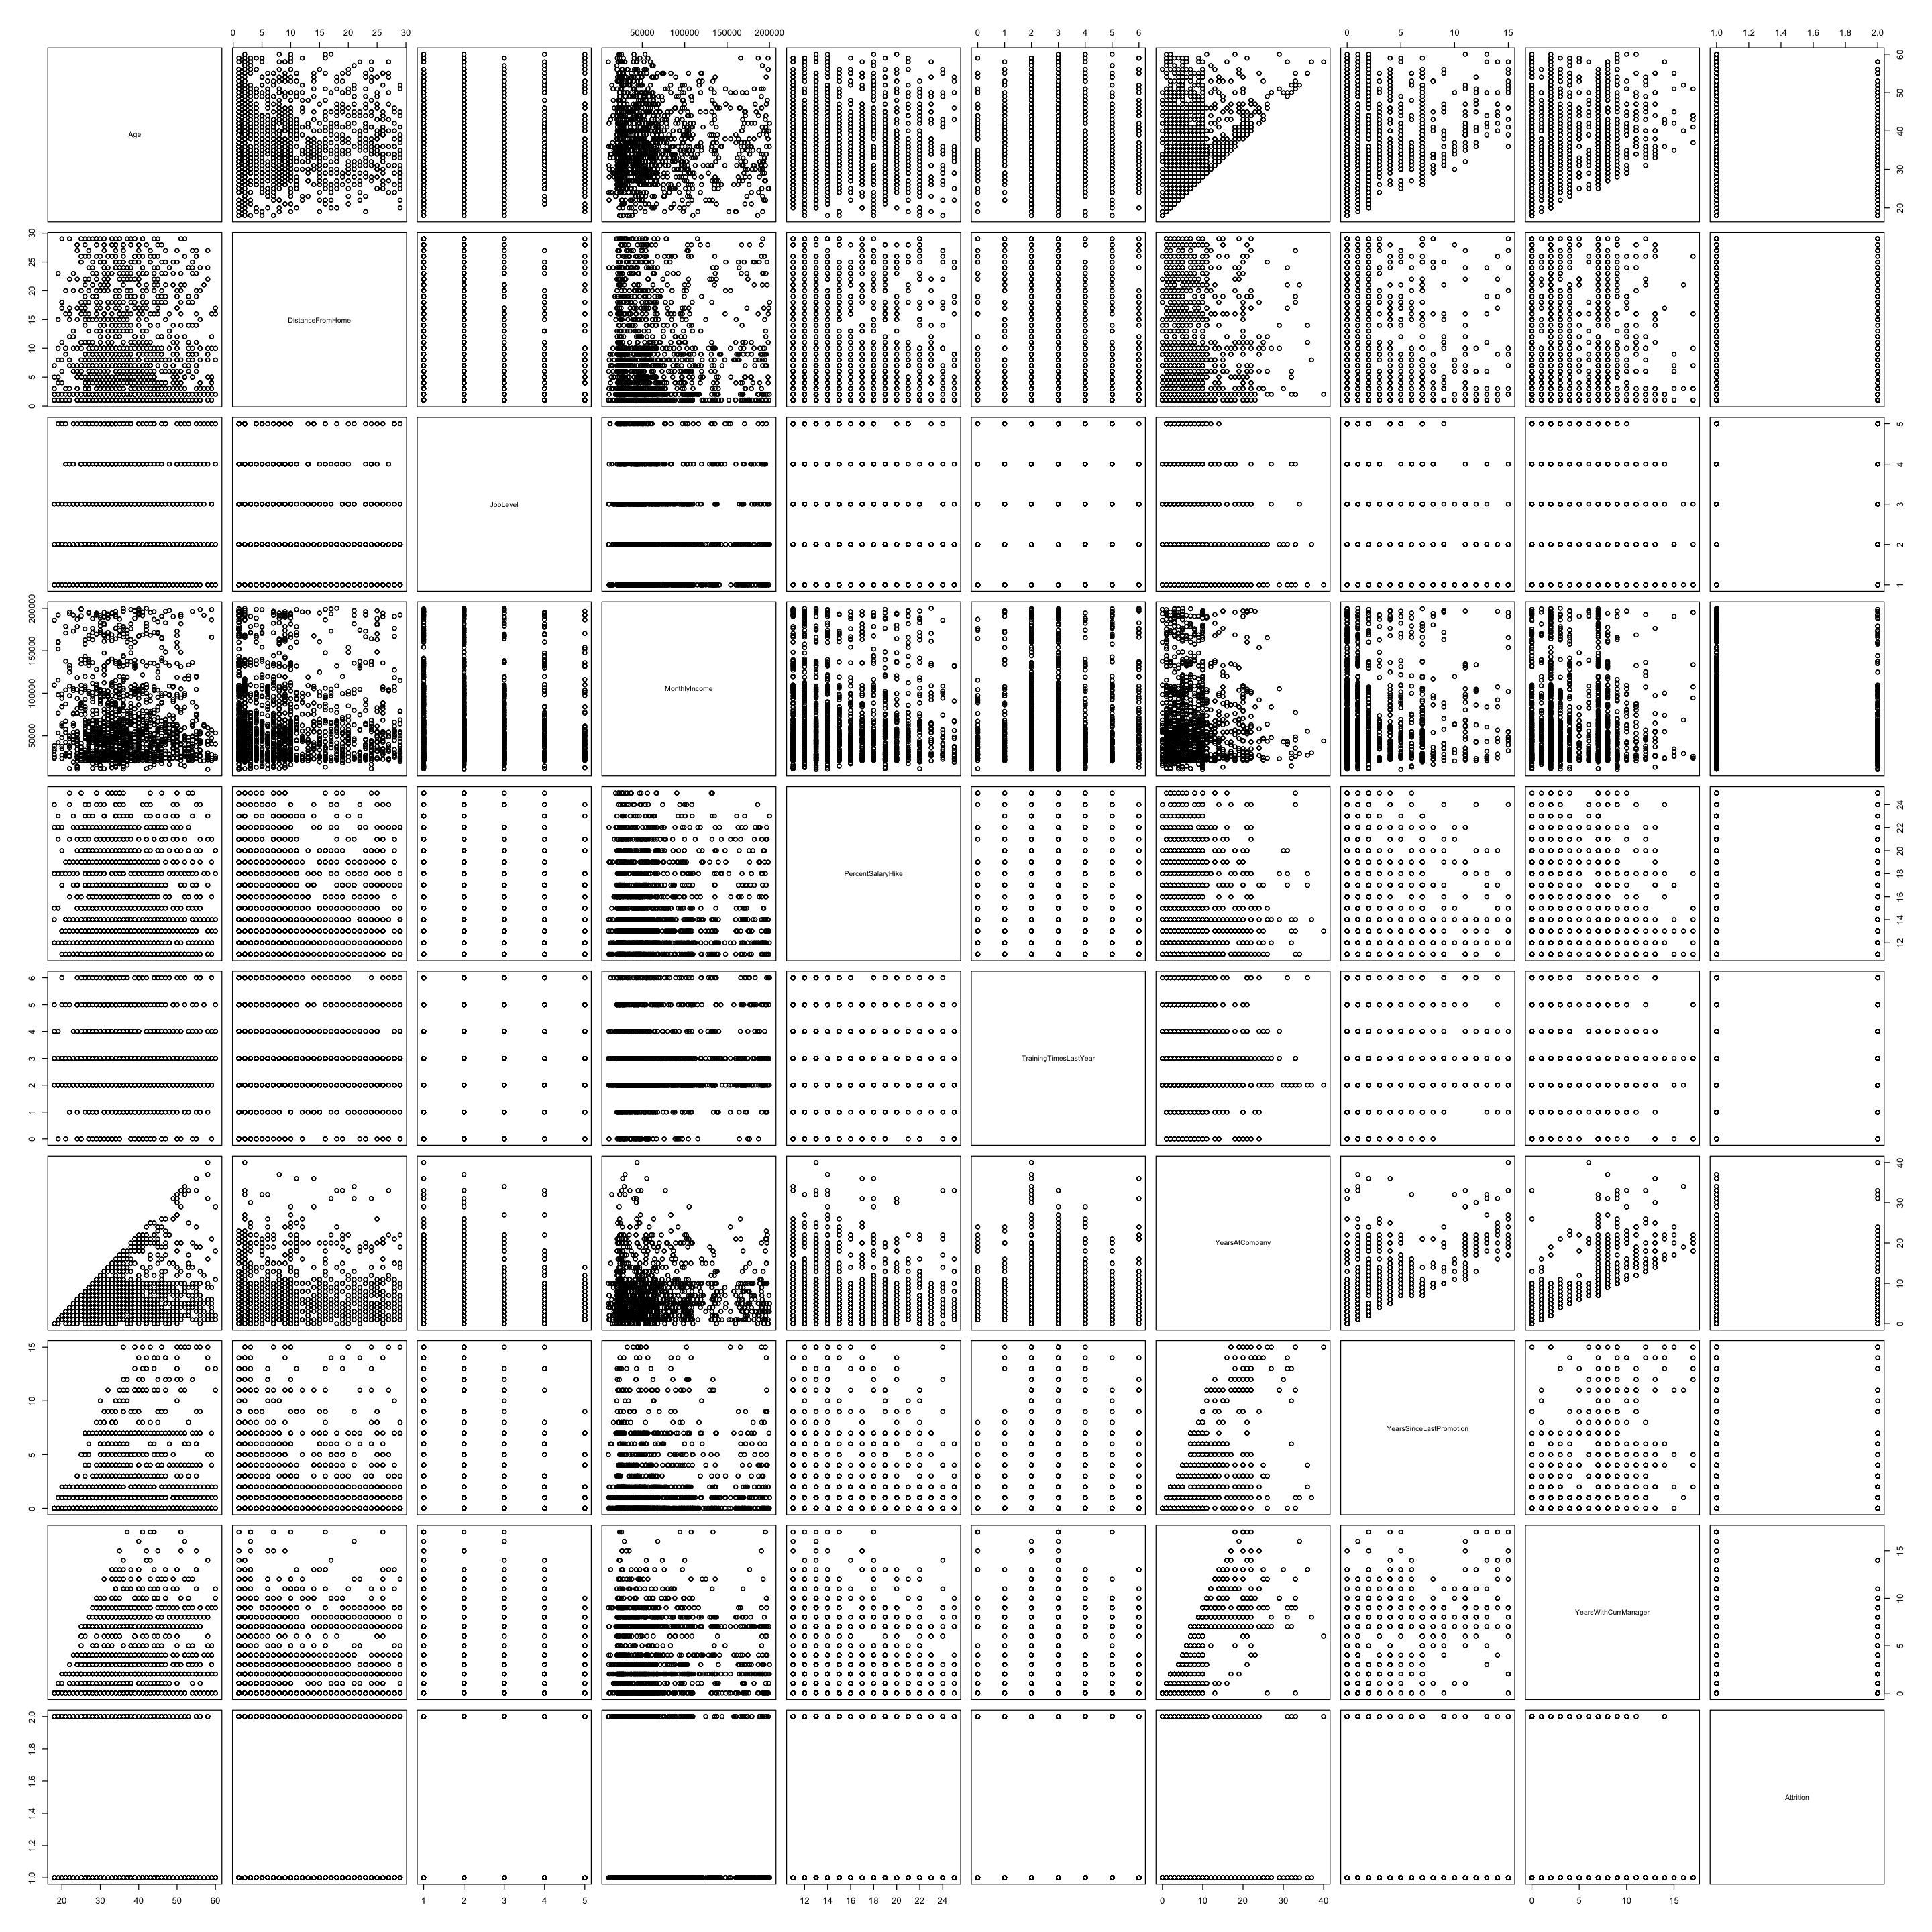

In [56]:
summary(data.gen_num)

d2<-cbind(data.gen_num, data.general[2])

summary(d2)

options(repr.plot.width = 24, repr.plot.height = 24)
plot(d2)

#options(repr.plot.width = 8, repr.plot.height = 8)
#for ( i in seq(1, length( data.gen_num ), 1) ) {
#    hist(data.gen_num[, i], xlab=names(data.gen_num[i]), main = paste("Histogram of",names(data.gen_num[i])))
 #   #lines(density(data.gen_num[, i]))
# }

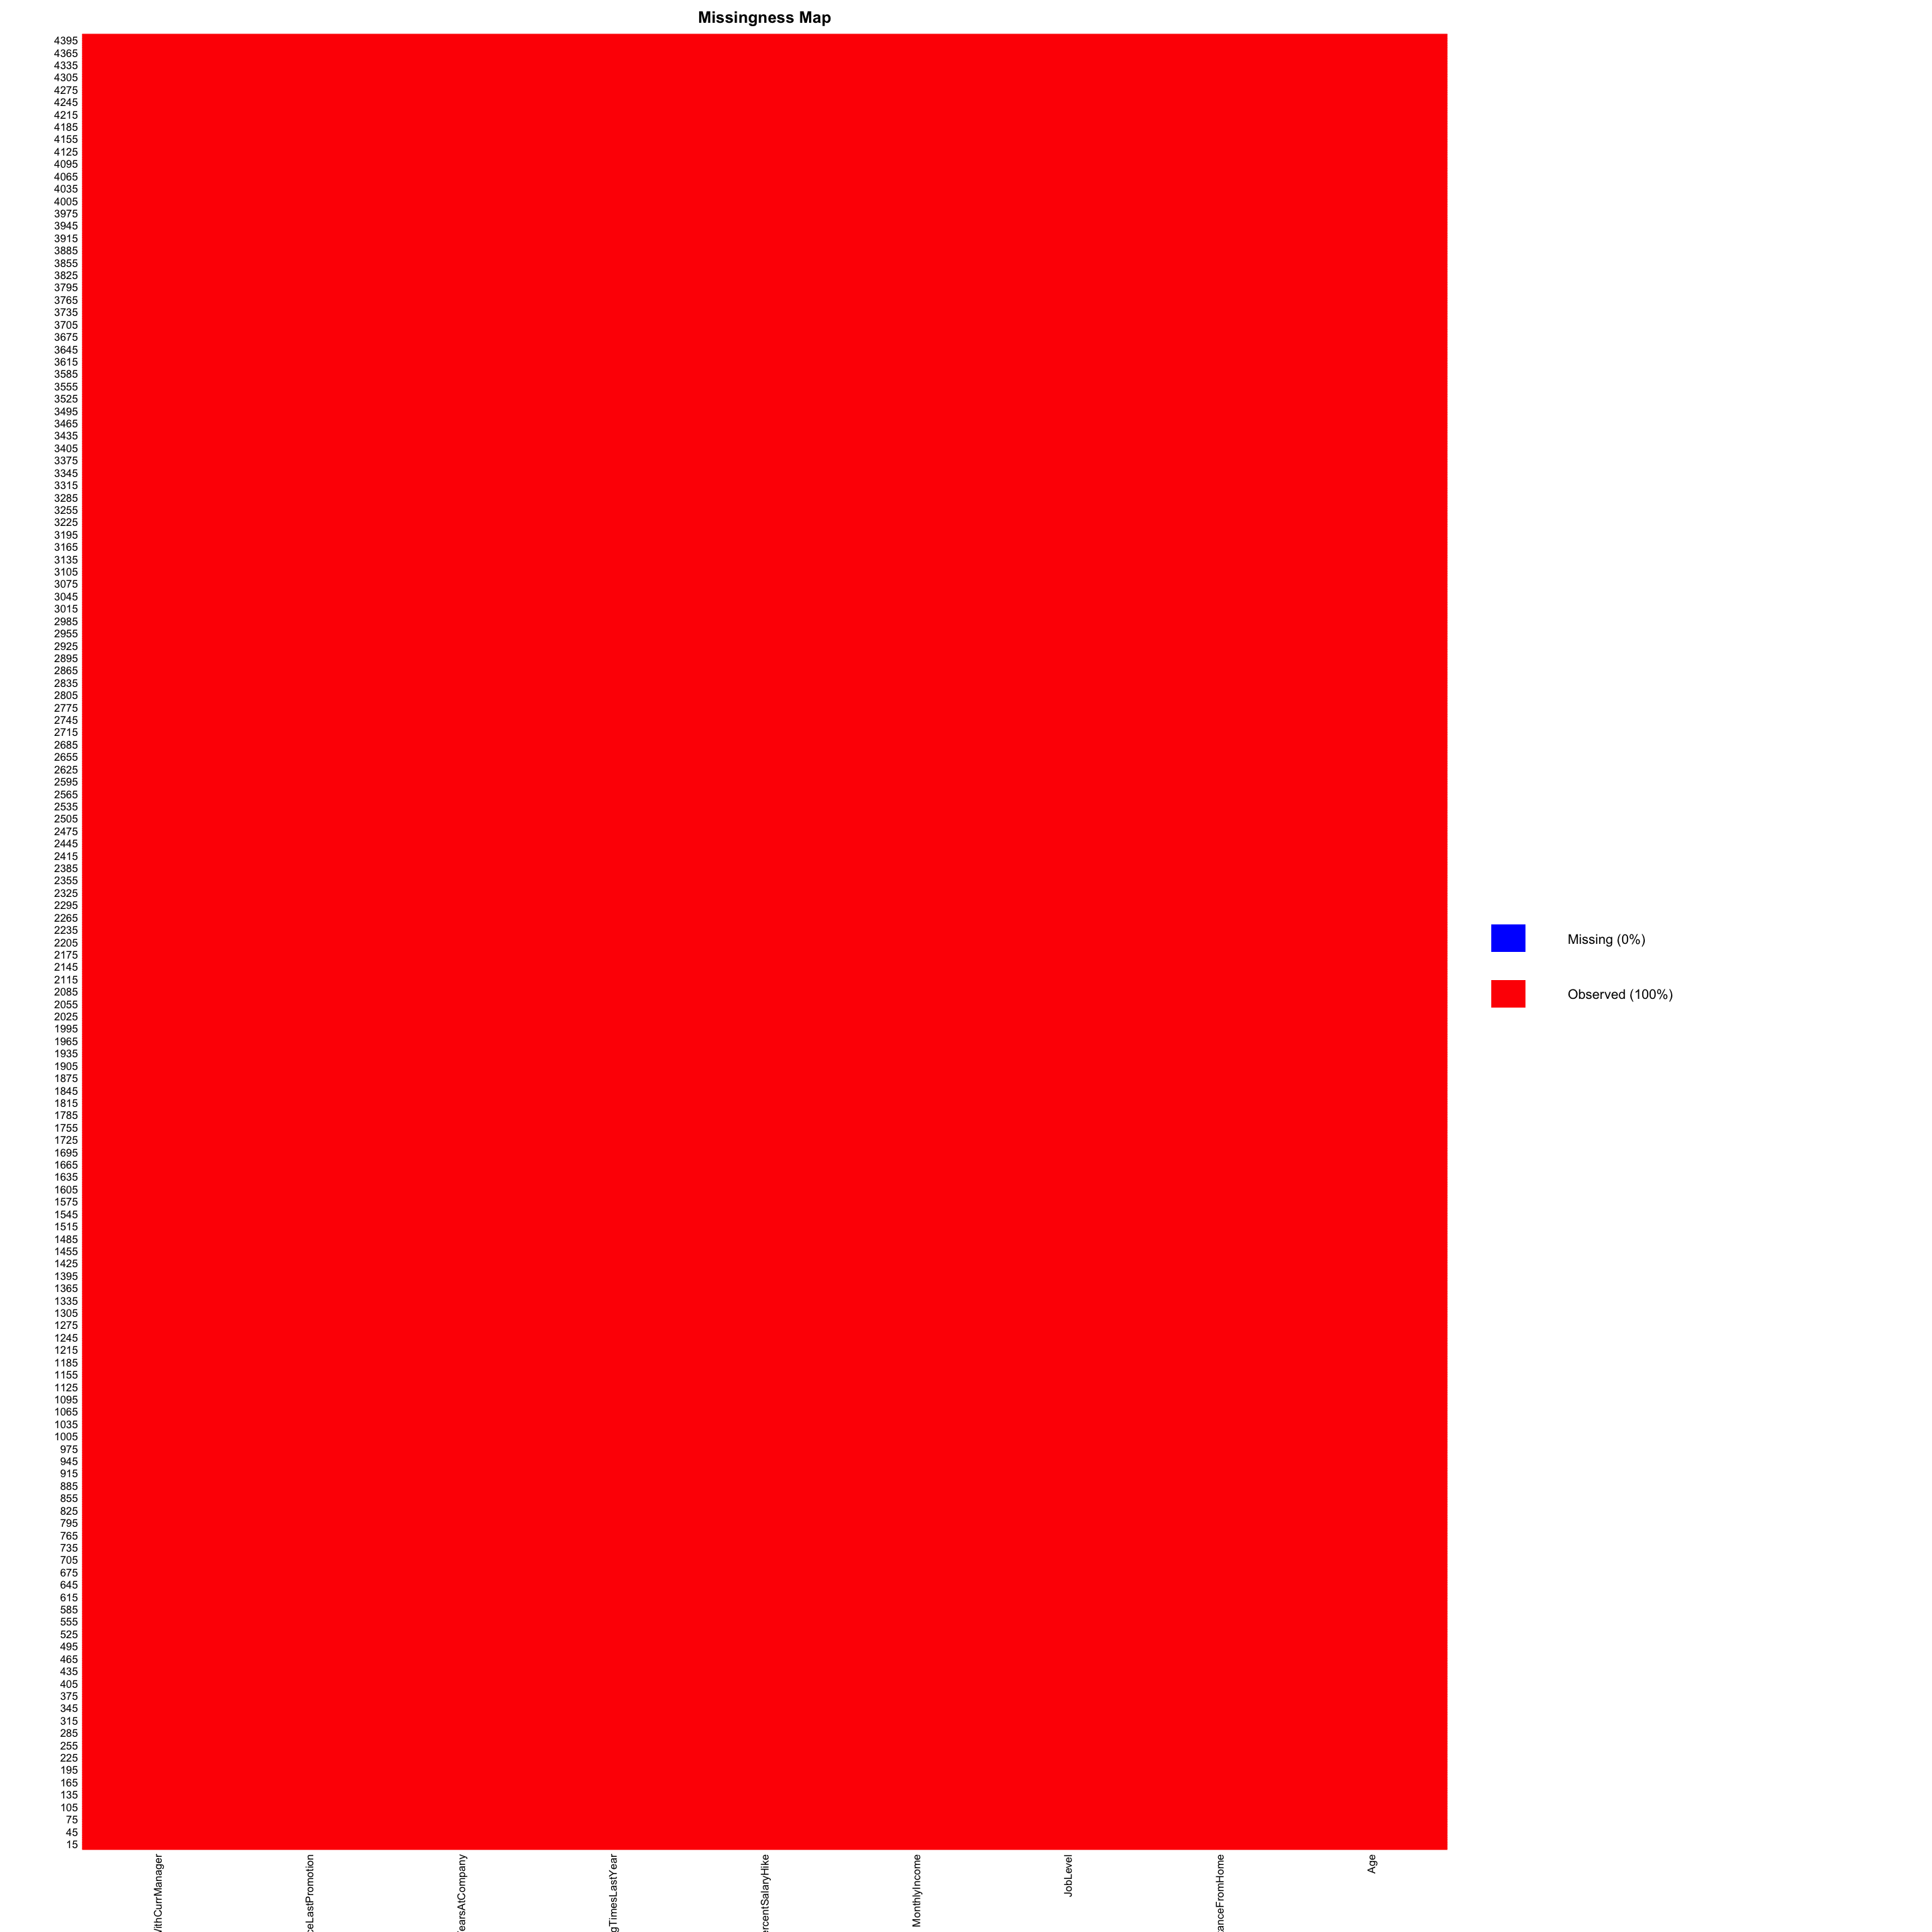

missmap {Amelia},R Documentation
obj,"an object of class ""amelia""; typically output from the function amelia, a matrix or a dataframe."
legend,should a legend be drawn?
col,a vector of length two where the first element specifies the color for missing cells and the second element specifies the color for observed cells.
main,"main title of the plot. Defaults to ""Missingness Map""."
x.cex,expansion for the variables names on the x-axis.
y.cex,expansion for the unit names on the y-axis.
y.labels,a vector of row labels to print on the y-axis
y.at,a vector of the same length as y.labels with row nmumbers associated with the labels.
csvar,column number or name of the variable corresponding to the unit indicator. Only used when the obj is not of class amelia.
tsvar,column number or name of the variable corresponding to the time indicator. Only used when the obj is not of class amelia.


In [59]:
help(missmap)
missmap(data.gen_num, col=c("blue", "red"), legend=TRUE)

In [ ]:
library(corrplot)

options(repr.plot.width = 24, repr.plot.height = 24)
correlations <- cor(data.gen_num)
corrplot(correlations, method="circle")

In [ ]:
stat.desc(data.gen_num)

In [ ]:
options(repr.plot.width = 24, repr.plot.height = 12)
par(mfrow=c(1,2))
for(i in seq(1, length(data.gen_num), 1)) {
   hist(data.gen_num[,i], main=names(data.gen_num)[i], xlab = names(data.gen_num)[i])
}

In [ ]:
pairs(data.general, col=data.general$Attrition)

In [ ]:
x <- data.gen_num
y <- data.general[,2]
scales <- list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=x, y=y, plot="density", scales=scales)

In [ ]:
# Followed article to learn more about Logistic Regression model building in R using glm():
#
# https://www.datacamp.com/community/tutorials/logistic-regression-R

mod1<-glm(
    as.factor(Attrition) ~ 
    Age +
#    DistanceFromHome +
#    JobLevel +
    MonthlyIncome +
#    PercentSalaryHike +
    TrainingTimesLastYear + 
    YearsAtCompany + 
    YearsSinceLastPromotion +
    YearsWithCurrManager
    , data=data.general
    , family = binomial)
summary(mod1)

In [ ]:
probs1<-predict(mod1, type = "response")
pred1<-ifelse(probs1 > 0.5, "Left", "Stayed")
table(pred1, Attrition)

In [ ]:
plot(mod1, main="General Data")

In [ ]:
cor(data.gen_num)

In [ ]:
# model<-lm(Attrition~Age)